In [ ]:
!pip install yfinance

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data2 = yf.download( tickers = "TAEE11.SA EGIE3.sa ENBR3.sa ALUP11.sa ^BVSP", start='2020-04-01')


In [4]:
dataClean = data2['Adj Close']


In [5]:
dataClean = dataClean.dropna()
#dataClean.dropna(inplace=True)


In [ ]:
dataClean

In [ ]:
dataClean.plot(figsize=(16,9))

In [8]:
adeqScala = MinMaxScaler()
adeqScala.fit(dataClean)
dataScala = adeqScala.transform(dataClean)

In [9]:
dataScala = pd.DataFrame(dataScala, columns=['TAEE11.SA', 'EGIE3.SA', 'ENBR3.SA', 'ALUP11.SA', '^BVSP'])

In [ ]:
dataScala

In [ ]:
dataScala.plot(figsize=(16,9))

In [ ]:
#caso queira agrupar os dados por mês usando a média
#dataClean = dataClean.resample('M').mean()

In [12]:
saida = dataClean.corr()

In [ ]:
saida

PRÓXIMA REUNIÃO 

In [ ]:
saida['^BVSP'].mean()

In [27]:
#Rentabilidade
#---------------------
d1 = pd.DataFrame(dataClean['ENBR3.SA']/dataClean['ENBR3.SA'].shift() * 100 - 100) 
#d2 = pd.DataFrame(dataClean['EGIE3.SA']/dataClean['EGIE3.SA'].shift() * 100 - 100)
d2 = pd.DataFrame(dataClean['^BVSP']/dataClean['^BVSP'].shift() * 100 - 100)  
d3 = pd.concat([d1,d2], axis=1)
d3

,ENBR3.SA,^BVSP
Date,,
2020-04-01,NaN,NaN
2020-04-02,-1.806444,1.812110
2020-04-03,-4.007892,-3.757629
2020-04-06,7.529092,6.521614
2020-04-07,1.082111,3.084795
...,...,...
2021-09-27,0.595564,0.264823
2021-09-28,-0.861140,-3.045350
2021-09-29,0.325730,0.892630


In [16]:
d3.dropna(inplace=True)
d3

,ENBR3.SA,EGIE3.SA
Date,,
2020-04-02,-1.806444,-0.235612
2020-04-03,-4.007892,-1.443200
2020-04-06,7.529092,3.434505
2020-04-07,1.082111,-1.055333
2020-04-08,0.377831,1.352749
...,...,...
2021-09-27,0.595564,-0.681159
2021-09-28,-0.861140,-0.422052
2021-09-29,0.325730,-0.158944


In [17]:
d1.dropna(inplace=True)
d2.dropna(inplace=True)

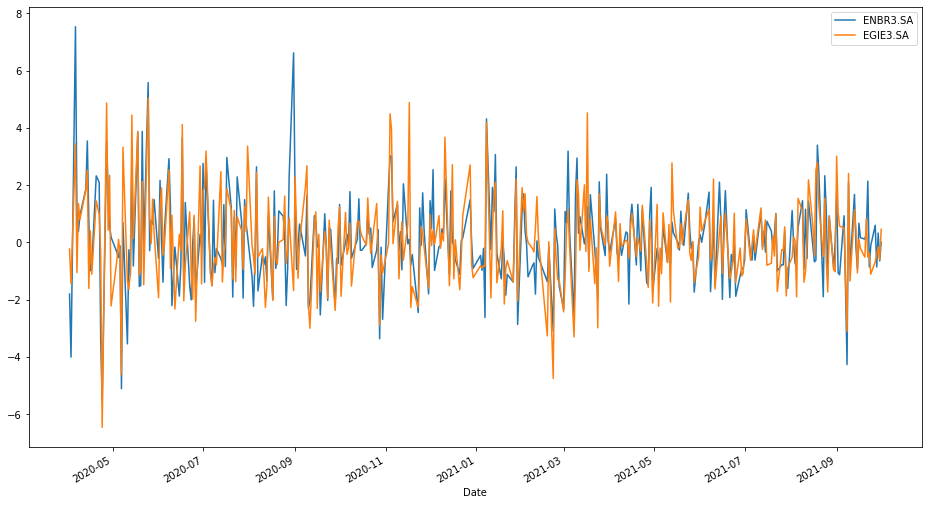

In [26]:
d3.plot(figsize=(16,9))

In [19]:
def rentAcao(acao, name):
  saldo = 1
  acaoList = []
  for i in acao[name]:
    saldo = saldo * (1+(i/100))
    acaoList.append(saldo)

  dfAcao = pd.DataFrame(acaoList, columns=[name])
  return dfAcao

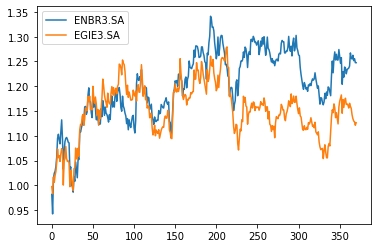

In [20]:
acoes = pd.concat([rentAcao(d3,'ENBR3.SA'), rentAcao(d3,'EGIE3.SA')])
acoes.plot()

In [21]:
#VAMOS MELHORAR A SOLUÇÃO
newData = pd.DataFrame(dataClean.div(dataClean.shift(), axis=1)*100-100) 

In [22]:
newData.dropna(inplace=True)

In [23]:
newData

,ALUP11.SA,EGIE3.SA,ENBR3.SA,TAEE11.SA,^BVSP
Date,,,,,
2020-04-02,6.796126,-0.235612,-1.806444,3.699325,1.812110
2020-04-03,1.731589,-1.443200,-4.007892,0.569266,-3.757629
2020-04-06,1.489368,3.434505,7.529092,2.264159,6.521614
2020-04-07,-4.276727,-1.055333,1.082111,-0.369019,3.084795
2020-04-08,0.876034,1.352749,0.377831,0.148156,2.968910
...,...,...,...,...,...
2021-09-27,0.477703,-0.681159,0.595564,0.627386,0.264823
2021-09-28,-2.694138,-0.422052,-0.861140,-0.433721,-3.045350
2021-09-29,0.000000,-0.158944,0.325730,0.054453,0.892630


In [24]:
dataFinal = pd.DataFrame()
for name in newData.columns.values:
    dataFinal = pd.concat([dataFinal, rentAcao(newData, name)], axis=1)

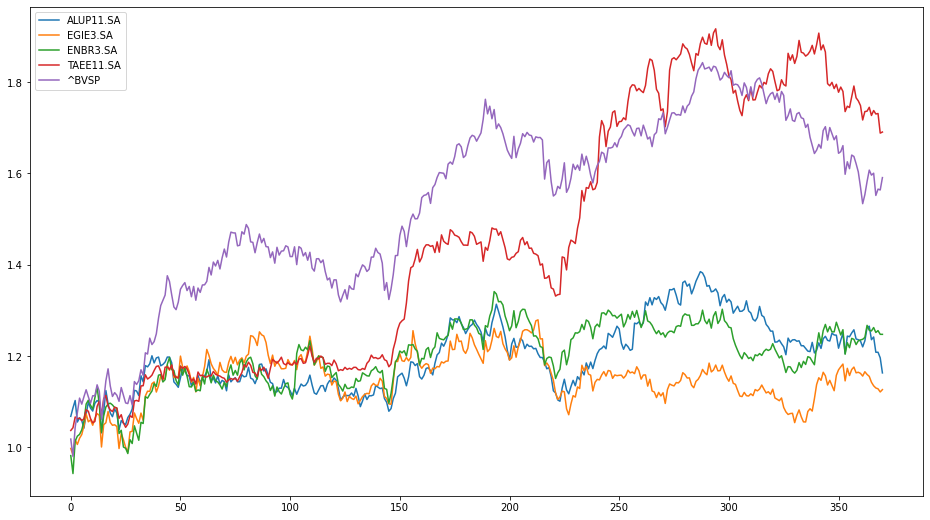

In [25]:
dataFinal.plot(figsize=(16,9))